In [1]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict

In [2]:
file_list = glob.glob('outfiles_backup/S2_230928_500-200/*data*.pkl')
file_list = [i.replace("outfiles_backup/S2_230928_500-200/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
file_list

[(1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (1, 51),
 (1, 52),
 (1, 53),
 (1, 54),
 (1, 55),
 (1, 56),
 (1, 57),
 (1, 58),
 (1, 59),
 (1, 60),
 (1, 61),
 (1, 62),
 (1, 63),
 (1, 64),
 (1, 65),
 (1, 66),
 (1, 67),
 (1, 68),
 (1, 69),
 (1, 70),
 (1, 71),
 (1, 72),
 (1, 73),
 (1, 74),
 (1, 75),
 (1, 76),
 (1, 77),
 (1, 78),
 (1, 79),
 (1, 80),
 (1, 81),
 (1, 82),
 (1, 83),
 (1, 84),
 (1, 85),
 (1, 86),
 (1, 87),
 (1, 88),
 (1, 89),
 (1, 90),
 (1, 91),
 (1, 92),
 (1, 93),
 (1, 94),
 (1, 95),
 (1, 96),
 (1, 97),
 (1, 98),
 (1, 99),
 (1, 100),

In [3]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])

for iter, p in file_list:
    path = "outfiles_backup/S2_230928_500-200/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    try:
        err = data['err']
        b = data['params'][0]
    except:
        err = np.nan
        b = np.nan
    pso_df = pd.concat([pso_df, pd.DataFrame({"iter":[iter],"particle":[p],"err":[err], "para": [b]})])
pso_df

,iter,particle,err,para
0,1,0,0.283863,0.568360
0,1,1,0.318634,0.448320
0,1,2,0.413950,0.230136
0,1,3,0.085193,0.713699
0,1,4,0.235085,0.703124
...,...,...,...,...
0,200,495,0.002460,0.221901
0,200,496,0.002430,0.221136
0,200,497,0.002426,0.214140
0,200,498,0.002408,0.221353


In [11]:
pso_df.groupby("iter").RMSE.min().tail(10)

iter
191    0.055512
192    0.055512
193    0.055512
194    0.055510
195    0.055517
196    0.055512
197    0.055512
198    0.055512
199    0.055510
200    0.055512
Name: RMSE, dtype: float64

In [4]:
pso_df['iter'] = pd.to_numeric(pso_df['iter'])
pso_df['RMSE'] = np.sqrt(pso_df.err)

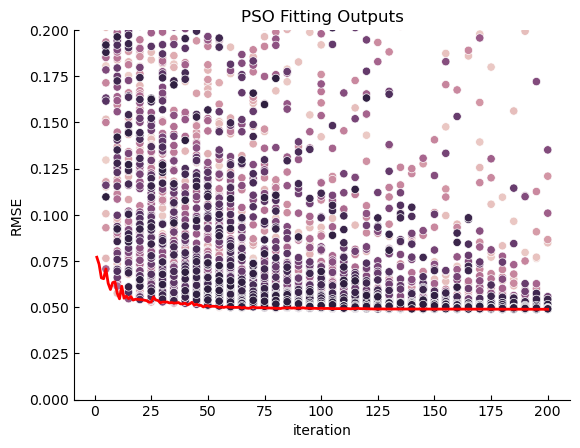

In [7]:
fig, ax = plt.subplots()
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.scatterplot(data=pso_df.query("iter % 5 == 0"), x="iter", y="RMSE", hue="particle")
plt.plot(pso_df.groupby("iter").RMSE.min(), lw=2, color='r')
plt.ylabel("RMSE")
plt.xlabel("iteration")
plt.ylim([0,0.2])
ax.legend().set_visible(False)
plt.title("PSO Fitting Outputs")
plt.show()

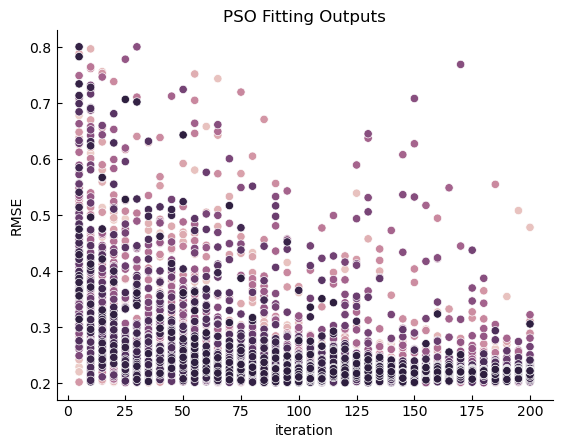

In [6]:
fig, ax = plt.subplots()
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.scatterplot(data=pso_df.query("iter % 5 == 0"), x="iter", y="para", hue="particle")
plt.ylabel("RMSE")
plt.xlabel("iteration")
# plt.ylim([0,0.2])
ax.legend().set_visible(False)
plt.title("PSO Fitting Outputs")
plt.show()